# Final Project - Data Science Course

##### This notebook written by:
- Chen Kubani
- Nave Cohen
- Elad Motola
- Eden Sar-Israel

# Know the data
Our data is hotels prices in NYC taken between 2015-2016.

# Let's start working - Exc.1
First, we will import the necessary libraries and the data, and start manipulating the data.
Then, according to exercise no.1 - we will add new columns (DayDiff, WeekDay, DiscountDiff, DiscountPerc)  

In [30]:
import numpy as np
import pandas as pd

In [31]:
hotels_df = pd.read_csv('./hotels_data.csv')

In [32]:
hotels_df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


In [33]:
# Converting to date
hotels_df["Snapshot Date"] = pd.to_datetime(hotels_df["Snapshot Date"])#, format='%m-/%d-/%y %-H:%M')
hotels_df["Checkin Date"] = pd.to_datetime(hotels_df["Checkin Date"])#, format='%m-/%d-/%y %H-:%M')

# Add new columns
hotels_df["DayDiff"] = (hotels_df["Checkin Date"].sub(hotels_df["Snapshot Date"], axis=0)).apply(lambda x: x.days)
hotels_df["WeekDay"] = hotels_df["Checkin Date"].apply(lambda x: x.strftime('%a'))
hotels_df["DiscountDiff"] = hotels_df["Original Price"] - hotels_df["Discount Price"]
hotels_df["DiscountPerc"] = (hotels_df["DiscountDiff"]/hotels_df["Original Price"]) * 100
hotels_df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,Wed,138,11.714771
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,Wed,131,11.769991
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,Thu,130,2.974828
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,Sun,72,4.140311
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,Wed,67,3.852789


In [34]:
hotels_df.to_csv("./Hotels_data_Changed.csv", encoding = "utf8")

# Exc. 2

## Data exploration
We want to predict the discount code that will give us the max discount.
First, we would like to investigate the correlation between discount code to other features and we will do it by discountPerc.

In [35]:
explore_df = hotels_df
explore_df["Hotel ID"] = explore_df["Hotel Name"].factorize()[0]
explore_df["WeekDayNum"] = explore_df["WeekDay"].factorize()[0]
print (explore_df.corr()["DiscountPerc"])

Snapshot ID        0.026398
Days                    NaN
Original Price    -0.151366
Discount Price    -0.258325
Discount Code     -0.036223
Available Rooms   -0.092789
Hotel Stars       -0.090960
DayDiff           -0.018199
DiscountDiff       0.672048
DiscountPerc       1.000000
Hotel ID          -0.076962
WeekDayNum        -0.054560
Name: DiscountPerc, dtype: float64


Having a quick view can show us that there is not a strong linear correlation between the discount percentage and the other features.

Let's try a different way and investigate the relation between the maximum discount for each column in the new data frame.

In [36]:
# Ex 2A
hotels_new = pd.read_csv('./Hotels_data_Changed.csv')
maxDiscountPerc = hotels_new.groupby(["WeekDay", "Snapshot Date", "Checkin Date", "DayDiff", "Hotel Name"])["DiscountPerc"].max()
maxDiscountPerc = maxDiscountPerc.to_frame().reset_index()
allResults = pd.merge(maxDiscountPerc, hotels_new, left_on=["WeekDay", "Snapshot Date", "Checkin Date", "DayDiff", "Hotel Name", "DiscountPerc"],
                       right_on=["WeekDay", "Snapshot Date", "Checkin Date", "DayDiff", "Hotel Name", "DiscountPerc"])
allResults[["WeekDay", "Snapshot Date", "Checkin Date", "DayDiff", "Hotel Name", "Discount Code"]].to_csv("./all_results.csv", encoding="utf8")
allResults.head()

,WeekDay,Snapshot Date,Checkin Date,DayDiff,Hotel Name,DiscountPerc,Unnamed: 0,Snapshot ID,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars,DiscountDiff
0,Fri,2015-07-17,2015-07-24,7,Andaz 5th Avenue - a concept by Hyatt,3.768382,596,1,5,2176,2094,3,7,4,82
1,Fri,2015-07-17,2015-07-24,7,DoubleTree by Hilton Hotel New York - Times Sq...,7.503234,778,1,5,1546,1430,3,-1,4,116
2,Fri,2015-07-17,2015-07-24,7,DoubleTree by Hilton New York City - Chelsea,9.310345,836,1,5,1450,1315,3,-1,4,135
3,Fri,2015-07-17,2015-07-24,7,Hampton Inn Madison Square Garden Area Hotel,3.950777,853,1,5,1544,1483,3,-1,3,61
4,Fri,2015-07-17,2015-07-24,7,Hampton Inn Manhattan Times Square Central,3.854240,730,1,5,1427,1372,3,-1,4,55


Let's try to see if we have a correlation between the Weekday and the maximum discount code.
In order to visualize the result we'll use matplotlib

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
discountcode_df = maxDiscountPerc

In [39]:
def create_plot_for_code(code):
    x = allResults[["WeekDay", "Discount Code"]]
    x = x.loc[x["Discount Code"] == code]
    labels = x.WeekDay.value_counts().index.tolist()
    values = x.WeekDay.value_counts()
    index = np.arange(len(labels))
    plt.bar(index, values)
    plt.xlabel('Week Day', fontsize=14)
    plt.ylabel('Frequancy', fontsize=14)
    plt.xticks(index, labels, fontsize=14, rotation=30)
    plt.title('Dicount code %d per weekday' % code)
    plt.show()


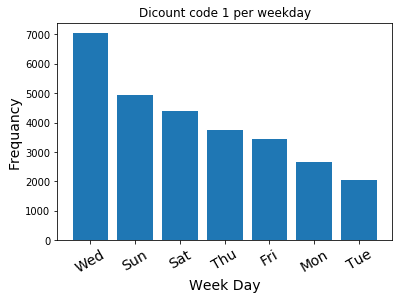

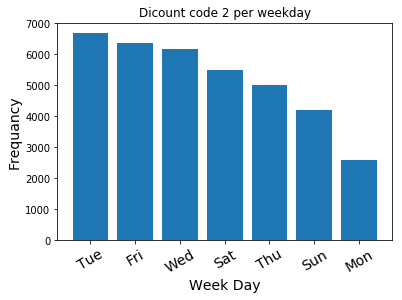

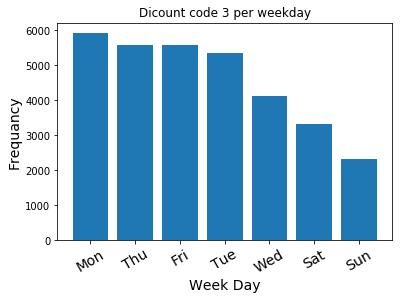

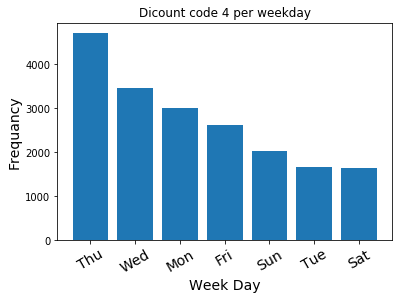

In [40]:
create_plot_for_code(1)
create_plot_for_code(2)
create_plot_for_code(3)
create_plot_for_code(4)

We can see that discount codes 1&2 are the most used codes, especially in the middle of the week. After them code 3, and then the least used code - 4.

Now, we are going to check the correlation between the columns again, after the manipulation we did.

In [41]:
explore_df = allResults
explore_df["Hotel ID"] = explore_df["Hotel Name"].factorize()[0]
explore_df["WeekDayNum"] = explore_df["WeekDay"].factorize()[0]
print (explore_df.corr()["DiscountPerc"])

DayDiff           -0.014849
DiscountPerc       1.000000
Unnamed: 0         0.146411
Snapshot ID        0.084118
Days                    NaN
Original Price    -0.114407
Discount Price    -0.233243
Discount Code     -0.027188
Available Rooms   -0.082800
Hotel Stars       -0.075999
DiscountDiff       0.680349
Hotel ID           0.017336
WeekDayNum         0.057380
Name: DiscountPerc, dtype: float64


Unfortunately, there is still a bad linear correlation between the columns, so now we will try to manipulate the data.

## Data manipulation
Now let's manipulate the data for the decision tree algorithm.

In [42]:
discounts = pd.read_csv('./all_results.csv')
discounts.head()

,Unnamed: 0,WeekDay,Snapshot Date,Checkin Date,DayDiff,Hotel Name,Discount Code
0,0,Fri,2015-07-17,2015-07-24,7,Andaz 5th Avenue - a concept by Hyatt,3
1,1,Fri,2015-07-17,2015-07-24,7,DoubleTree by Hilton Hotel New York - Times Sq...,3
2,2,Fri,2015-07-17,2015-07-24,7,DoubleTree by Hilton New York City - Chelsea,3
3,3,Fri,2015-07-17,2015-07-24,7,Hampton Inn Madison Square Garden Area Hotel,3
4,4,Fri,2015-07-17,2015-07-24,7,Hampton Inn Manhattan Times Square Central,3


In [43]:
# Drop the dubble index column
discounts = discounts.drop(discounts.columns[0], axis=1)

In [44]:
discounts.head()

,WeekDay,Snapshot Date,Checkin Date,DayDiff,Hotel Name,Discount Code
0,Fri,2015-07-17,2015-07-24,7,Andaz 5th Avenue - a concept by Hyatt,3
1,Fri,2015-07-17,2015-07-24,7,DoubleTree by Hilton Hotel New York - Times Sq...,3
2,Fri,2015-07-17,2015-07-24,7,DoubleTree by Hilton New York City - Chelsea,3
3,Fri,2015-07-17,2015-07-24,7,Hampton Inn Madison Square Garden Area Hotel,3
4,Fri,2015-07-17,2015-07-24,7,Hampton Inn Manhattan Times Square Central,3


Each categorical feature will become a number using factorize / LabelEncoder

In [45]:
from sklearn.preprocessing import LabelEncoder

weekday_enc = LabelEncoder()

discounts['WeekDay'] = weekday_enc.fit_transform(discounts['WeekDay'])
discounts['Hotel Name'] = discounts['Hotel Name'].factorize()[0] * np.random.randint(10000)

In [46]:
discounts.head()

,WeekDay,Snapshot Date,Checkin Date,DayDiff,Hotel Name,Discount Code
0,0,2015-07-17,2015-07-24,7,0,3
1,0,2015-07-17,2015-07-24,7,6200,3
2,0,2015-07-17,2015-07-24,7,12400,3
3,0,2015-07-17,2015-07-24,7,18600,3
4,0,2015-07-17,2015-07-24,7,24800,3


We want all our data to be numerical, so we have to manipulate the date columns.

In [47]:
discounts.dtypes

WeekDay           int32
Snapshot Date    object
Checkin Date     object
DayDiff           int64
Hotel Name        int64
Discount Code     int64
dtype: object

We want to get the best specific result so we decided to split the date to 3 columns - day, month, year.

In [48]:
discounts['Snapshot Date'] = pd.to_datetime(discounts['Snapshot Date'])
discounts['Checkin Date'] = pd.to_datetime(discounts['Checkin Date'])

discounts['Snapshot year'], discounts['Snapshot Month'], discounts['Snapshot Day'] = discounts['Snapshot Date'].dt.year, discounts['Snapshot Date'].dt.month, discounts['Snapshot Date'].dt.day
discounts['Checkin year'], discounts['Checkin Month'], discounts['Checkin Day'] = discounts['Checkin Date'].dt.year, discounts['Checkin Date'].dt.month, discounts['Checkin Date'].dt.day

discounts.head()

,WeekDay,Snapshot Date,Checkin Date,DayDiff,Hotel Name,Discount Code,Snapshot year,Snapshot Month,Snapshot Day,Checkin year,Checkin Month,Checkin Day
0,0,2015-07-17,2015-07-24,7,0,3,2015,7,17,2015,7,24
1,0,2015-07-17,2015-07-24,7,6200,3,2015,7,17,2015,7,24
2,0,2015-07-17,2015-07-24,7,12400,3,2015,7,17,2015,7,24
3,0,2015-07-17,2015-07-24,7,18600,3,2015,7,17,2015,7,24
4,0,2015-07-17,2015-07-24,7,24800,3,2015,7,17,2015,7,24


In [49]:
# Drop the full date columns.
discounts = discounts.drop(['Snapshot Date', 'Checkin Date'], axis=1)
discounts.head()

,WeekDay,DayDiff,Hotel Name,Discount Code,Snapshot year,Snapshot Month,Snapshot Day,Checkin year,Checkin Month,Checkin Day
0,0,7,0,3,2015,7,17,2015,7,24
1,0,7,6200,3,2015,7,17,2015,7,24
2,0,7,12400,3,2015,7,17,2015,7,24
3,0,7,18600,3,2015,7,17,2015,7,24
4,0,7,24800,3,2015,7,17,2015,7,24


## Decision Tree Model

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

features = discounts.drop('Discount Code', axis=1)
labels = discounts['Discount Code']
model = DecisionTreeClassifier(criterion='entropy', splitter='best')
train_X, test_X, train_y, test_y = train_test_split(features, labels)
model.fit(train_X, train_y)
train_predicted = model.predict(train_X)
test_predicted = model.predict(test_X)

print("train classification report")
print(classification_report(train_y, train_predicted))

print("test classification report")
print(classification_report(test_y, test_predicted))

print("Train Accuracy:" + str(accuracy_score(train_y, train_predicted)))
print("Test Accuracy:" + str(accuracy_score(test_y, test_predicted)))

train classification report
              precision    recall  f1-score   support

           1       0.88      1.00      0.94     21190
           2       0.95      0.96      0.96     27375
           3       0.99      0.92      0.95     24194
           4       1.00      0.89      0.94     14178

   micro avg       0.95      0.95      0.95     86937
   macro avg       0.95      0.94      0.95     86937
weighted avg       0.95      0.95      0.95     86937

test classification report
              precision    recall  f1-score   support

           1       0.68      0.73      0.70      7064
           2       0.72      0.72      0.72      9054
           3       0.73      0.71      0.72      7931
           4       0.73      0.67      0.70      4930

   micro avg       0.71      0.71      0.71     28979
   macro avg       0.71      0.71      0.71     28979
weighted avg       0.71      0.71      0.71     28979

Train Accuracy:0.9479623175402878
Test Accuracy:0.7097898478208358


#### Accuracy: 0.71

In [51]:
print(features.head())
model.feature_importances_

   WeekDay  DayDiff  Hotel Name  Snapshot year  Snapshot Month  Snapshot Day  \
0        0        7           0           2015               7            17   
1        0        7        6200           2015               7            17   
2        0        7       12400           2015               7            17   
3        0        7       18600           2015               7            17   
4        0        7       24800           2015               7            17   

   Checkin year  Checkin Month  Checkin Day  
0          2015              7           24  
1          2015              7           24  
2          2015              7           24  
3          2015              7           24  
4          2015              7           24  


array([0.03107188, 0.16999662, 0.38550521, 0.00045793, 0.05288376,
       0.14209344, 0.00556004, 0.06733915, 0.14509196])

## Decision Tree ROC

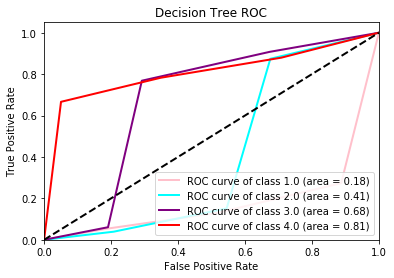

In [52]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

# Compute ROC curve & area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(0, 4):
    fpr[i], tpr[i], _ = roc_curve(test_y, test_predicted, pos_label=(int(i)+1))
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(0, 4)]))

# Interpolate ROC curves
mean_tpr = np.zeros_like(all_fpr)
for i in range(0,4):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Average & compute AUC
mean_tpr /= 4

# Plot
plt.figure()
lw=2
colors = cycle(['pink', 'aqua', 'purple', 'red'])
for i, color in zip(range(0,4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1.0, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes Model

Now let's try naive bayes classifier.

To use this model, we will manipulate the data into different structure - binary table that each checkin date and snapshot date will become a column. 

In [53]:
nb_data = pd.read_csv("./all_results.csv")
nb_data['Snapshot Date'] = pd.to_datetime(nb_data['Snapshot Date'])
nb_data['Checkin Date'] = pd.to_datetime(nb_data['Checkin Date'])

nb_data['Snapshot year'], nb_data['Snapshot Month'],nb_data['Snapshot Day'] = nb_data['Snapshot Date'].dt.year, nb_data['Snapshot Date'].dt.month,  nb_data['Snapshot Date'].dt.day
nb_data['Checkin year'], nb_data['Checkin Month'],nb_data['Checkin Day'] = nb_data['Checkin Date'].dt.year, nb_data['Checkin Date'].dt.month, nb_data['Checkin Date'].dt.day

nb_data = nb_data.drop(['Snapshot Date', 'Checkin Date', nb_data.columns[0]], axis=1)

# We decided to drop he hotel column because after testing we got that most of them are zero and drop it improves the result
nb_data = nb_data.drop('Hotel Name', axis=1)

nb_data["Weekday ID"] = nb_data["WeekDay"].factorize()[0]
weekdays = pd.get_dummies(nb_data["Weekday ID"]).add_prefix('Weekday_')
nb_data = nb_data.join(weekdays)
nb_data = nb_data.drop('Weekday ID', axis=1)
X = nb_data.drop(["WeekDay", "Discount Code"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, nb_data[["Discount Code"]])

In [54]:
X_train.head()

,DayDiff,Snapshot year,Snapshot Month,Snapshot Day,Checkin year,Checkin Month,Checkin Day,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
108511,5,2015,10,23,2015,10,28,0,0,0,0,0,0,1
109879,2,2015,11,2,2015,11,4,0,0,0,0,0,0,1
51316,32,2015,9,2,2015,10,4,0,0,0,1,0,0,0
79123,1,2015,12,30,2015,12,31,0,0,0,0,1,0,0
1500,2,2015,7,29,2015,7,31,1,0,0,0,0,0,0


In [57]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

model = GaussianNB()
model.fit(X_train, Y_train.values.ravel())
NBpredicted = model.predict(X_test)
NBexpected = Y_test
print(classification_report(NBexpected, NBpredicted))
print("Test Accuracy:" + str(accuracy_score(NBexpected, NBpredicted)))

              precision    recall  f1-score   support

           1       0.35      0.44      0.39      7026
           2       0.38      0.47      0.42      9041
           3       0.41      0.21      0.27      8140
           4       0.25      0.25      0.25      4772

   micro avg       0.35      0.35      0.35     28979
   macro avg       0.35      0.34      0.33     28979
weighted avg       0.36      0.35      0.34     28979

Test Accuracy:0.35177197280789535


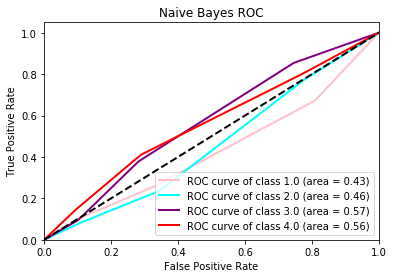

In [56]:
# Compute ROC curve & ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(0, 4):
    fpr[i], tpr[i], _ = roc_curve(NBexpected, NBpredicted, pos_label=(int(i)+1))
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(0, 4)]))

# Interpolate ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(0,4):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= 4

# Plot
plt.figure()
lw=2
colors = cycle(['pink', 'aqua', 'purple', 'red'])
for i, color in zip(range(0,4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1.0, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC')
plt.legend(loc="lower right")
plt.show()

### Explanation

Now, let's talk about the diffrences between the 2 algorithms. The decision tree model is absolutely better (with about 71% accuracy) compared to the naive bayes with 35% accuracy.

From the ROC curve we can learn the the decision tree predicts really good the 4th discount code but has a high false positive rate for the 1st sicount code.

We choose the GaussianNB Naive Bayes as a classifier because the data is not normally distributed. The data contains less of the 4th code than the others. And the result is not really good. In the ROC curve we can see that the model predicts approximatly with the same mistake each of the four features.